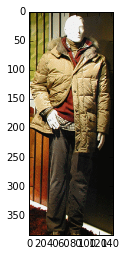

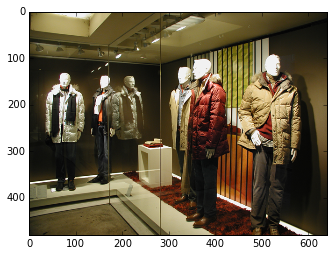

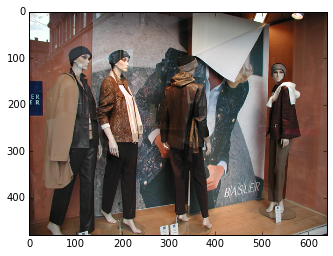

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

def imread(url):
    return cv2.cvtColor(cv2.imread(url), cv2.COLOR_BGR2RGB)

person = imread('person.png')
people = imread('people.png')
people2 = imread('people2.png')

person2 = cv2.imread('person.png')

plt.figure()
plt.imshow(person)
plt.figure()
plt.imshow(people)
plt.figure()
plt.imshow(people2)

## Sobel filter edge detection

In [4]:
# DRAW FUNC
def paint_mats(mats):
    cols = len(mats)

    fig, axs = plt.subplots(
    1,
    cols,
    figsize=(32, 16),
    sharex=True,
    sharey=True)

    i = 0
    try:
        for ax in axs:
            ax.axis('off')
            ax.imshow(mats[i], cmap=plt.cm.gray)
            ax.set_adjustable('box-forced')
            i += 1
    except:
        axs.axis('off')
        axs.imshow(mats[i], cmap=plt.cm.gray)
        axs.set_adjustable('box-forced')
            
    plt.show()

(-0.5, 143.5, 383.5, -0.5)

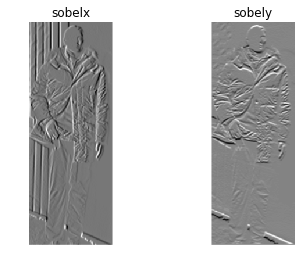

In [5]:
# Sobel
import scipy.ndimage.filters as filters

gray_person = cv2.cvtColor(person, cv2.COLOR_RGB2GRAY)
gray_person_bl = cv2.GaussianBlur(gray_person, (3, 3), 0)

# convolute
sobelx = cv2.Sobel(gray_person_bl, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_person_bl, cv2.CV_64F, 0, 1, ksize=3)

#plt.imshow(gray_person, cmap=plt.get_cmap('gray'))
fig1, (ax1, ax2) = plt.subplots(
    ncols=2, 
    sharex=True, 
    sharey=True, 
    subplot_kw={'adjustable':'box-forced'})

ax1.imshow(sobelx, cmap=plt.get_cmap('gray'), interpolation='none')
ax1.set_title('sobelx')
ax1.axis('off')

ax2.imshow(sobely, cmap=plt.get_cmap('gray'), interpolation='none')
ax2.set_title('sobely')
ax2.axis('off')

## actually apply sobel

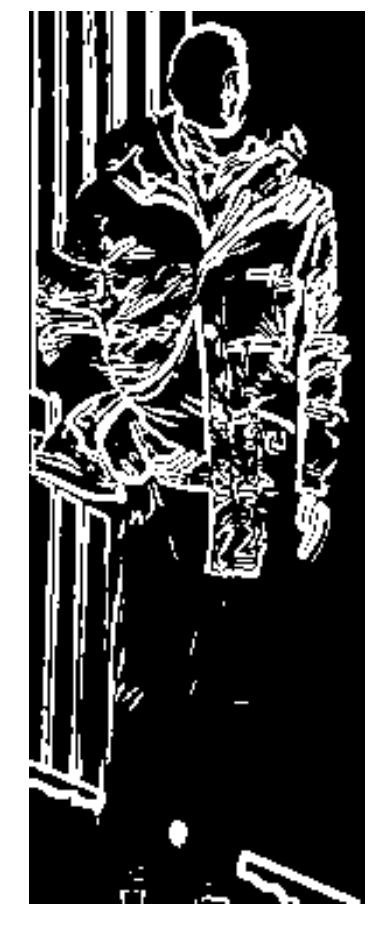

In [6]:
sobelx2 = np.multiply(sobelx, sobelx)
sobely2 = np.multiply(sobely, sobely)

Sob = np.sqrt(np.add(sobelx2, sobely2))

Sob = np.greater(Sob, 140).astype(int)

paint_mats([Sob])

## start with HOGs

In [7]:
from skimage.feature import hog
from skimage import data, color, exposure

image = gray_person.copy()

fd, hog_image = hog(
    image,
    orientations=4,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), visualise=True)

#paint_mats([image, hog_image_rescaled])

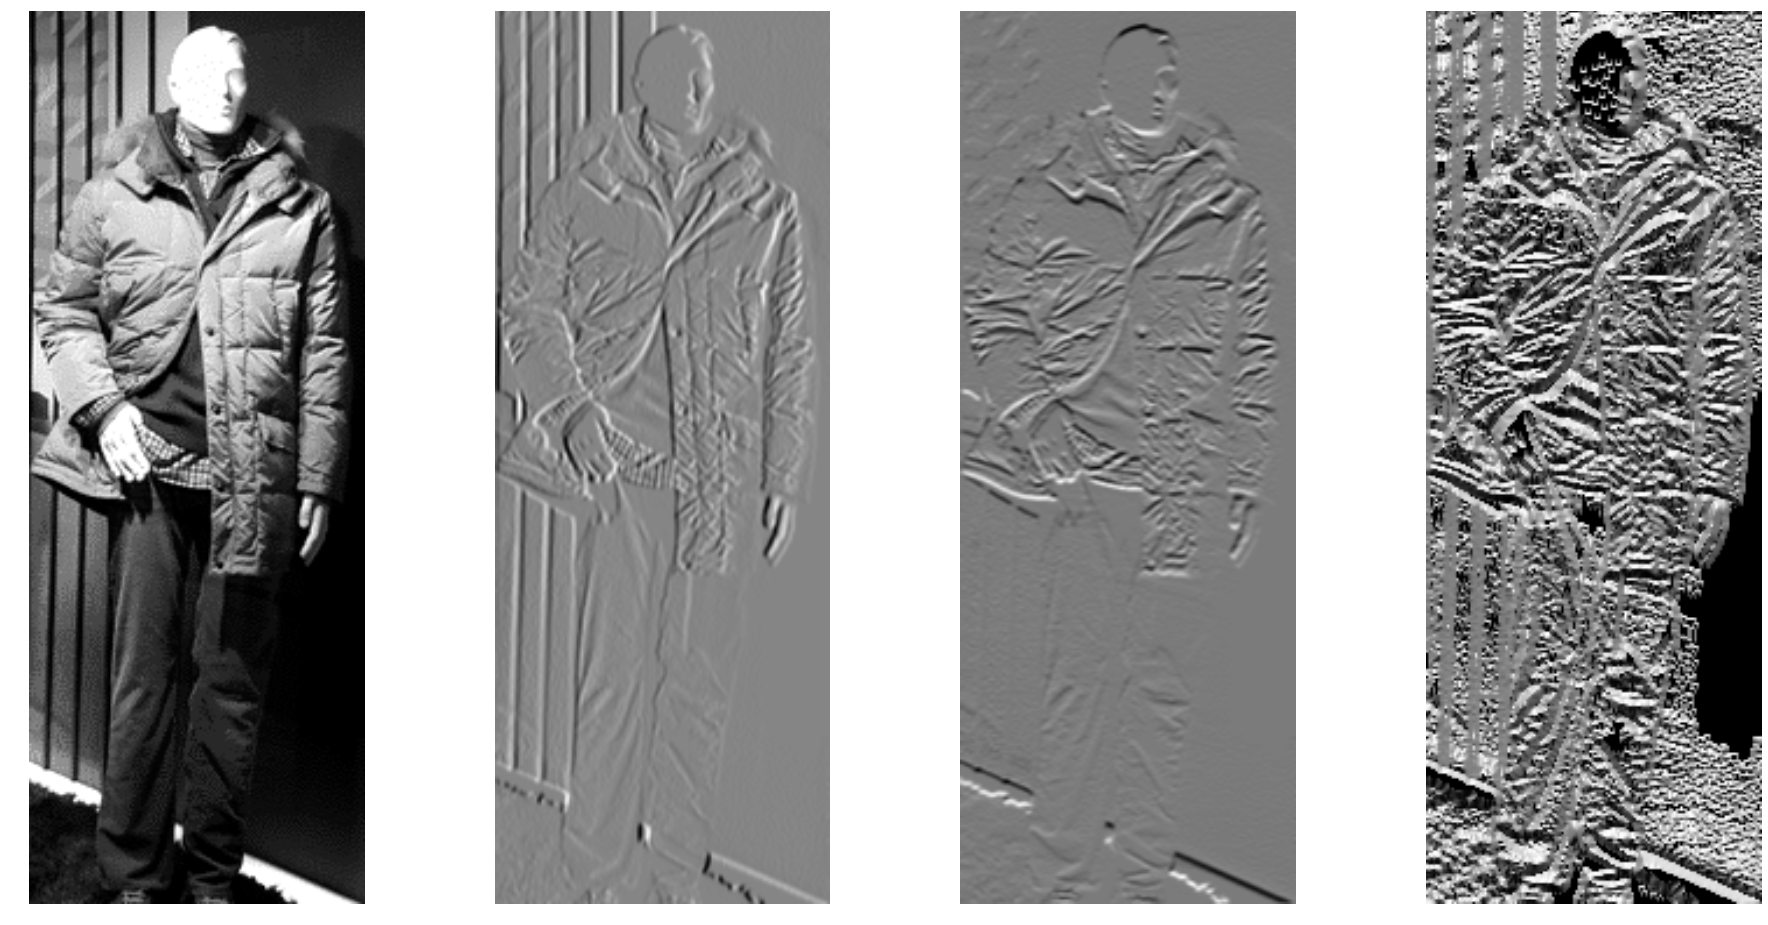

In [8]:
import scipy.ndimage as ndimage

# own hog implementation
image = gray_person.copy().astype(float)
winkel = image

# derivate the image
sob_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=float)
sob_kernel_x = np.transpose(sob_kernel_y)

sob_x = ndimage.convolve(image, sob_kernel_x, mode='nearest')
sob_y = ndimage.convolve(image, sob_kernel_y, mode='nearest')

# direction of gradient
Phi = np.absolute(np.arctan2(sob_x, sob_y))  # dont care abt. direction


paint_mats([image, sob_x, sob_y, Phi])

In [15]:
import math
print(math.pi)

# roi
cell_w = 8
block_h = 16
buckets = 9

single_step = math.pi / buckets
print("steps " + str(single_step))
print(Phi)

def histo(I, x, y):
    histo = [0] * buckets
    w = block_h
    h = block_h
    for x in range(w):
        for y in range(h):
            val = math.floor(I[x][y]/single_step) - 1
            histo[val] += 1
    return histo

def vec(histo):
    pass

for x in range(0, Phi.shape[1], cell_w):
    for y in range(0, Phi.shape[0], cell_w):
        vector = vec(histo(Phi, x, y))
        

3.141592653589793
steps 0.3490658503988659
[[ 1.5120405   1.00406711  1.54554917 ...,  0.78539816  0.46364761
   0.78539816]
 [ 1.57079633  1.57079633  1.57079633 ...,  0.61072596  0.06656816
   0.32175055]
 [ 1.62337939  2.19104581  1.54963546 ...,  2.35619449  2.73670087
   2.35619449]
 ..., 
 [ 2.46217885  2.23484249  1.83704838 ...,  0.18697927  0.38831872
   0.27490984]
 [ 2.8543112   2.82955053  2.58728516 ...,  2.70302939  2.53086669
   0.23374318]
 [ 3.0356083   3.00727121  2.8198421  ...,  2.27799607  2.04329326
   1.40564765]]
val 3
val 1
val 3
val 3
val 0
val 2
val 2
val 4
val 1
val 2
val 5
val 4
val 3
val 3
val 3
val 3
val 3
val 3
val 3
val 3
val 0
val 2
val 2
val 2
val -1
val 4
val 5
val 4
val 3
val 2
val 3
val 3
val 3
val 5
val 3
val 2
val 1
val 2
val 7
val 6
val 6
val 5
val 5
val 3
val 3
val 6
val 3
val 3
val 3
val 3
val 3
val 3
val 2
val 6
val 6
val 7
val 6
val 5
val 6
val 3
val 3
val 2
val 3
val 2
val 3
val 5
val 3
val 3
val 7
val 7
val 6
val 8
val 4
val 3
val 2
val 3
